In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df_processed = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

In [ ]:
# Preencher 'Age' com a mediana
df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
# Preencher 'Embarked' com a moda (valor mais frequente)
df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)
# Preencher 'Fare' com a mediana
df_processed['Fare'].fillna(df_processed['Fare'].median(), inplace=True)



C:\Users\rafam\AppData\Local\Temp\ipykernel_36096\2475133223.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
C:\Users\rafam\AppData\Local\Temp\ipykernel_36096\2475133223.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [ ]:
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df_processed['Sex'] = le_sex.fit_transform(df_processed['Sex'])
df_processed['Embarked'] = le_embarked.fit_transform(df_processed['Embarked'])


In [ ]:
X = df_processed.drop(columns=['Survived','Sex'])
y = df_processed['Survived']


In [ ]:
arvore_cross1 = DecisionTreeClassifier(criterion='entropy')
scores_arvore_cross1 = cross_val_score(arvore_cross1, X, y, cv=10)

# Resultados
print("Acurácias em cada fold:", scores_arvore_cross1)
print("Acurácia média:", scores_arvore_cross1.mean())

Acurácias em cada fold: [0.5952381  0.54761905 0.64285714 0.69047619 0.66666667 0.5
 0.5952381  0.71428571 0.68292683 0.6097561 ]
Acurácia média: 0.624506387921022


In [ ]:
# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
print("\n--- Árvore de Decisão ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))


--- Árvore de Decisão ---
Acurácia: 0.5952380952380952
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        85
           1       0.35      0.29      0.32        41

    accuracy                           0.60       126
   macro avg       0.52      0.52      0.52       126
weighted avg       0.58      0.60      0.58       126

Matriz de Confusão:
[[63 22]
 [29 12]]


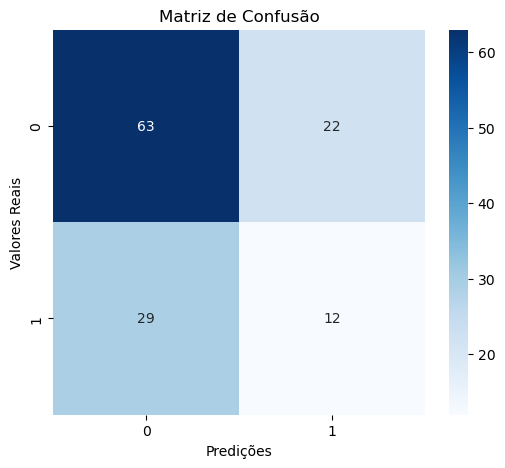

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
labels = np.unique(y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.show()